# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
Answer - Analysis the pattern inside the data using the means of visualisation, finding missing values and checking the distribution of the variables and summarizing key statistics. The goal of EDA is to gain insights, discover relationships, and prepare the data for further modeling or analysis.

* Data-point/vector/Observation

* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

haberman = pd.read_csv("haberman.csv")

In [2]:
print(f"The shape of the Haberman dataset is {haberman.shape}")
print(f"Column name of the datasets are {haberman.columns}")

The shape of the Haberman dataset is (306, 4)
Column name of the datasets are Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [16]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [21]:
#Question : How many data points of each class are there 

haberman["status"].value_counts() / len(haberman)

# the dataset is highligly imbalance with more survivors and less number of non survivors

status
1    0.735294
2    0.264706
Name: count, dtype: float64

# Haberman Dataset 

 A Simple Machine learning dataset usually used for experimentation and learning purpose.
 * 306 instances and 3 features 
 * Contain cases of a study from 1958 to 1970 at University of Chicago's Billings Hospital of paitaint who went breast cancer surgery 
 * Features - age , operation_year , positive_auxillary_nodes
 * age - The age of the paitant 
 * operation_year - The year in which the operation is performed 
 * positive_auxillary_nodes - The number of positive auxillary nodes present in the paitant 

 * Target Value - survival_status (1 or 2 ) 
 *  1 - The patient survived 5 years or more

 *  2 - The patient survived less than 5 years

 * Objective : Given the age of a patient and the auxillary node determine weather the person will survive more than 5 years  or not 


In [18]:
haberman.describe(include="all")

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Age**
1. The age of patient is from 30 to 83 with a mean age of 52 years.
2. 50% of the total patients are below 52 years old and 75% of patients are below 60 years old.

**Year**
1. The first surgery was recorded in the year 1958 and the last surgery was recorded in the year 1969.
2. 75% of the patients have surgery before 1965.

**Auxilary Nodes**
1. The minimum number of nodes in a patients are 0 and the max is 52.
2. 50% of the total patients have 0 or 1 nodes at the time of surgery. 
3. 75% of the total patients have less than 4 nodes at the time of surgery.

**Survival Status**
1. More than 73% of the total patients survived more than 5 years. 


In [20]:
haberman["nodes"].value_counts()

nodes
0     136
1      41
3      20
2      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
22      3
23      3
19      3
12      2
20      2
30      1
21      1
52      1
16      1
24      1
46      1
18      1
35      1
17      1
25      1
28      1
Name: count, dtype: int64

Most of the patients have 0 nodes at thte time of surgery and only few patients have very high number of auxilary nodes.

# 2 - D Scatter Plot 

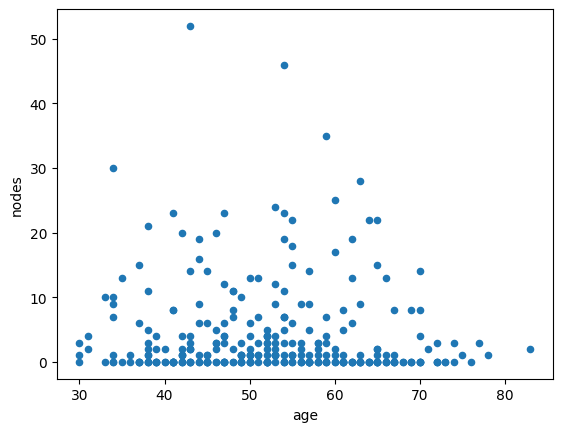

In [4]:
# 2-D scatter plot between age and number of nodes 

haberman.plot(kind="scatter" , x="age" , y="nodes");
plt.show()

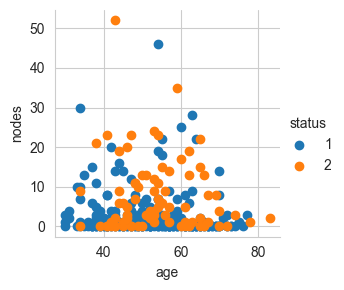

In [5]:
# 2-D scatterplot with color coding for each class 

sns.set_style("whitegrid")
sns.FacetGrid(haberman , hue="status") \
    .map(plt.scatter , "age" , "nodes").add_legend()

plt.show()

#all the class points are grouped together hence we could not create a good inference from this 

From the above scatter plot we can infer that patients whos survived more than 5 years mostly had 0 auxilary nodes.

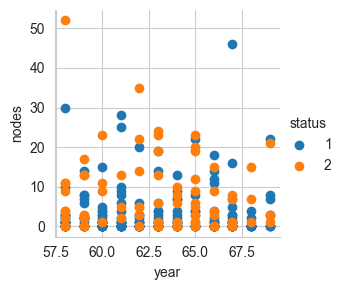

In [6]:
# 2-D scatterplot with color coding for each class 

sns.set_style("whitegrid")
sns.FacetGrid(haberman , hue="status") \
    .map(plt.scatter , "year" , "nodes").add_legend()

plt.show()

#all the class points are grouped together hence we could not create a good inference from this 

We can not infer anything with this plot 

# 3D Scatterplot

In [7]:
import plotly.express as px
fig = px.scatter_3d(haberman, x='age', y='nodes', z='year',
              color='status')
fig.show()

# Pair Plot 

c:\Users\ankush\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



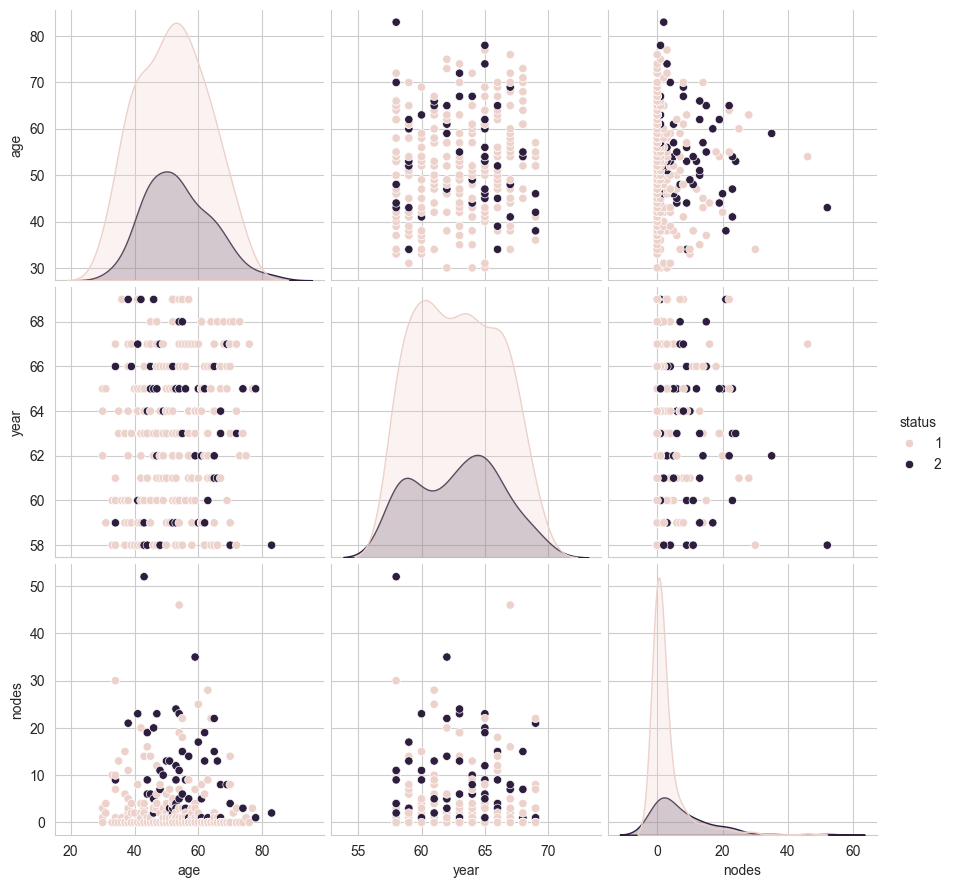

In [ ]:
plt.close();

sns.set_style("whitegrid");

sns.pairplot(haberman , hue="status" , size=3)
plt.show()

# The daigonal plot in the pairplot are the pdf of each feature that are there in the dataset. 

The pair plot between age and nodes states that most of the patients who survived more than 5 years have 0 nodes irrespective of the age. 

# Histogram PDF and CDF 

<Axes: xlabel='age', ylabel='Count'>

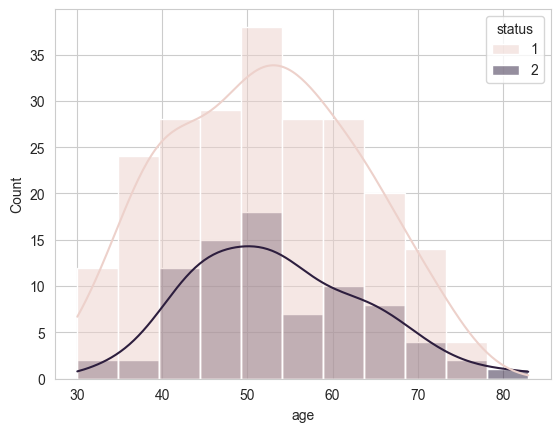

In [14]:
sns.histplot(data = haberman , x = "age" , hue="status" , kde =True)

<Axes: xlabel='nodes', ylabel='Count'>

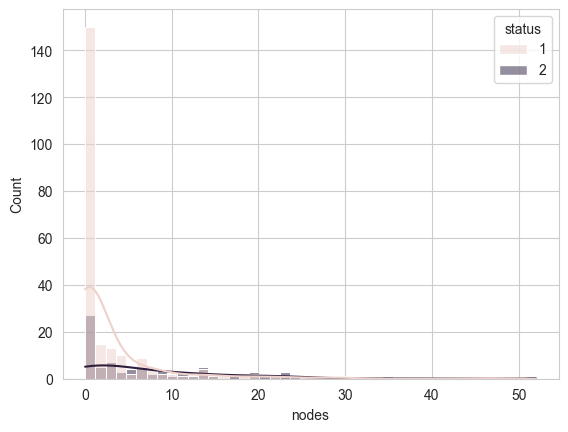

In [22]:
sns.histplot(data = haberman , x = "nodes" , hue="status" , kde =True)

[]

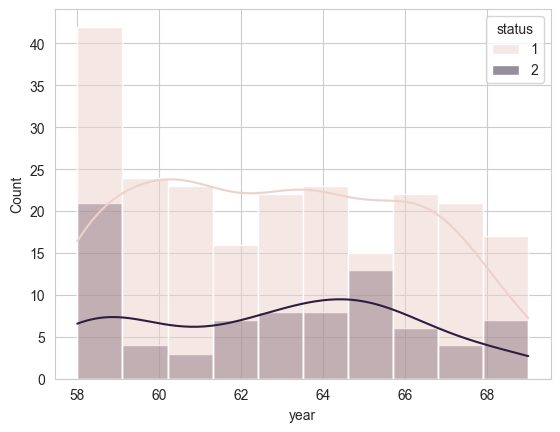

In [23]:
sns.histplot(data = haberman , x = "year" , hue="status" , kde =True)
plt.plot()

Over the year the number of surgeries have been reduced which might be becuase of the better knowledge of these disease and life style changes  

In [28]:
alive = haberman[haberman["status"] == 1]
dead = haberman[haberman["status"] == 2]

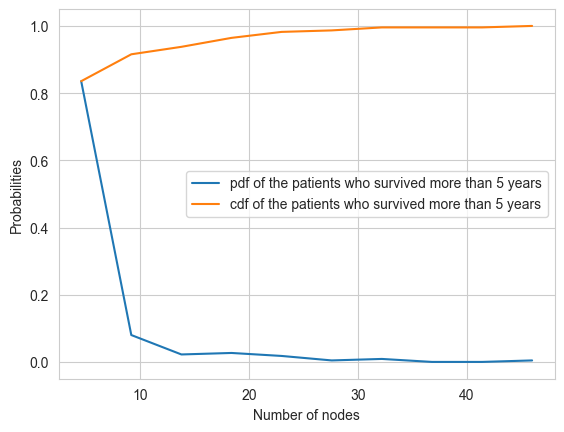

In [41]:
counts , bins = np.histogram(alive["nodes"] , bins=10 , density=True)

pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bins[1:],pdf )
plt.plot(bins[1:],cdf)

common=" of the patients who survived more than 5 years"
plt.legend(["pdf"+common , "cdf" + common])

plt.xlabel("Number of nodes")
plt.ylabel("Probabilities")
plt.show()

more than 90% of the total patients who survived have less than 10 nodes

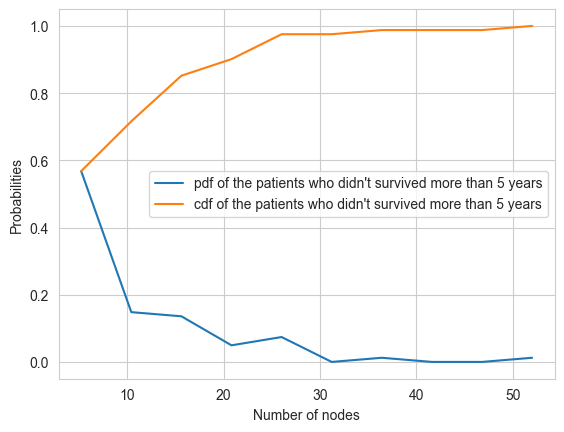

In [40]:
counts , bins = np.histogram(dead["nodes"] , bins=10 , density=True)

pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bins[1:],pdf )
plt.plot(bins[1:],cdf)

common=" of the patients who didn't survived more than 5 years"
plt.legend(["pdf"+common , "cdf" + common])

plt.xlabel("Number of nodes")
plt.ylabel("Probabilities")
plt.show()

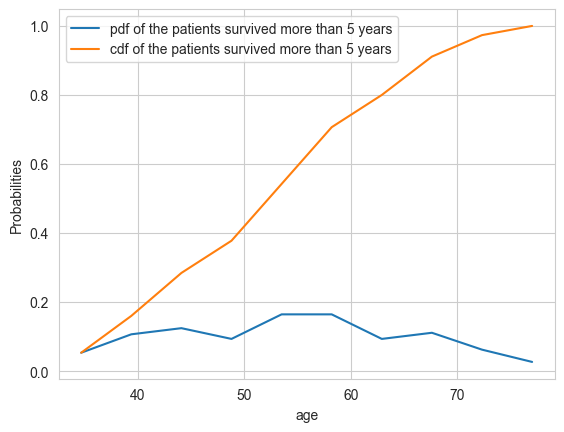

In [46]:
counts , bins = np.histogram(alive["age"] , bins=10 , density=True)

pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bins[1:],pdf )
plt.plot(bins[1:],cdf)

common=" of the patients survived more than 5 years"
plt.legend(["pdf"+common , "cdf" + common])

plt.xlabel("age")
plt.ylabel("Probabilities")
plt.show()

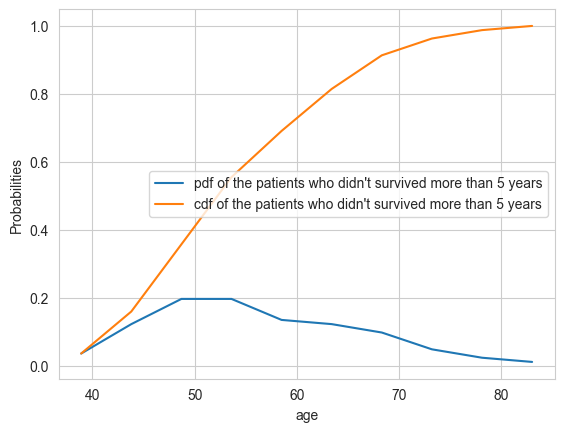

In [45]:
counts , bins = np.histogram(dead["age"] , bins=10 , density=True)

pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bins[1:],pdf )
plt.plot(bins[1:],cdf)

common=" of the patients who didn't survived more than 5 years"
plt.legend(["pdf"+common , "cdf" + common])

plt.xlabel("age")
plt.ylabel("Probabilities")
plt.show()

# Statics of both alive and dead

In [42]:
alive.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [43]:
dead.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Box and voilin plot 

<Axes: xlabel='status', ylabel='nodes'>

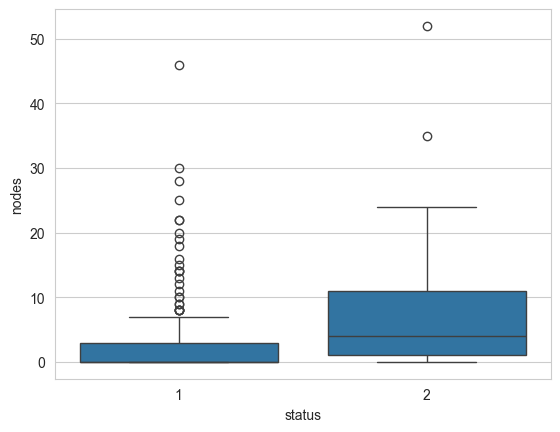

In [47]:
sns.boxplot(data=haberman , x="status" , y="nodes")

1. While Most of the values of survining patients are less than 10 there are some outliers who have nodes more than 10 but still survived.

2. Patients who died generally tend to have more than 5 number of nodes.

<Axes: xlabel='status', ylabel='nodes'>

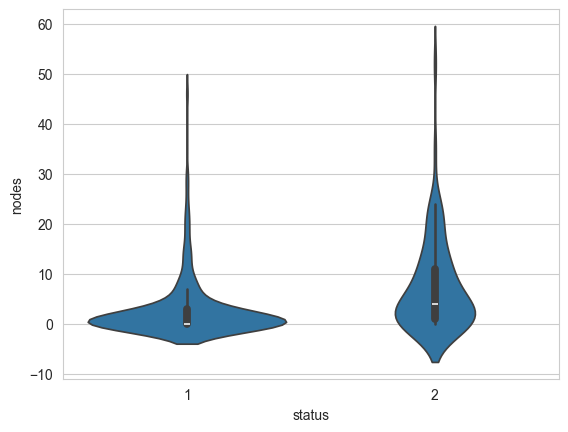

In [48]:
sns.violinplot(data=haberman , x="status" , y="nodes")